In [63]:
import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [161]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
sp500_2013_2018 = pd.read_csv('sp500_data/SP500.csv')

In [57]:
print(sp500_2013_2018.head()) 

         Date        Open        High         Low       Close   Adj Close  \
0  1990-12-31  328.709991  330.230011  327.500000  330.220001  330.220001   
1  1991-01-02  330.200012  330.750000  326.450012  326.450012  326.450012   
2  1991-01-03  326.459991  326.529999  321.899994  321.910004  321.910004   
3  1991-01-04  321.910004  322.350006  318.869995  321.000000  321.000000   
4  1991-01-07  320.970001  320.970001  315.440002  315.440002  315.440002   

      Volume  
0  114130000  
1  126280000  
2  141450000  
3  140820000  
4  130610000  


In [58]:
sp500_high_low

,High,Low,mean
Date,,,
1990-12-31,330.230011,327.500000,328.865005
1991-01-02,330.750000,326.450012,328.600006
1991-01-03,326.529999,321.899994,324.214996
1991-01-04,322.350006,318.869995,320.610001
1991-01-07,320.970001,315.440002,318.205001
...,...,...,...
2017-10-13,2557.649902,2552.090088,2554.869995
2017-10-16,2559.469971,2552.639893,2556.054932
2017-10-17,2559.709961,2554.689941,2557.199951


In [67]:
#获取 Train Test 数据集
sp500_date = sp500_2013_2018['Date']
sp500_high_low = sp500_2013_2018.loc[:,['High','Low']]
sp500_high_low = sp500_high_low.set_index(sp500_date)
sp500_high_low['mean'] = sp500_high_low[['High','Low']].mean(axis=1)

sp500_Train = sp500_high_low.loc[:,['mean']]
sp500_Test =  sp500_high_low.loc[:,['mean']][6001:]
sp500_Test_Input = sp500_2013_2018.loc[:,['Date']][6001:]

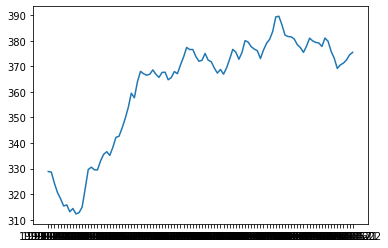

In [81]:
sp500_mean_log = np.log(sp500_high_low.loc[:,['mean']])
plt.plot(sp500_Train.iloc[:100])

In [107]:

# 移动平均图
def draw_trend(timeseries, size):
    f = plt.figure(facecolor='white')
    # 对size个数据进行移动平均
    rol_mean = timeseries.rolling(window=size).mean()
    # 对size个数据移动平均的方差
    rol_std = timeseries.rolling(window=size).std()
 
    timeseries.plot(color='blue', label='Original')
    rol_mean.plot(color='red', label='Rolling Mean')
    rol_std.plot(color='black', label='Rolling standard deviation')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
 
def draw_ts(timeseries):
    f = plt.figure(facecolor='white')
    timeseries.plot(color='blue')
    plt.show()

def teststationarity(ts):
    dftest = adfuller(ts)
    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

def decompose(timeseries):
    
    # 返回包含三个部分 trend（趋势部分） ， seasonal（季节性部分） 和residual (残留部分)
    decomposition = seasonal_decompose(timeseries)
    
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    plt.subplot(411)
    plt.plot(ts_log, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    return trend , seasonal, residual

def draw_moving(timeSeries, size):
    f = plt.figure(facecolor='white')
    # 对size个数据进行移动平均
    rol_mean = timeSeries.rolling(window=size).mean()
    # 对size个数据进行加权移动平均
    #rol_weighted_mean = pd.ewma(timeSeries, span=size)
    rol_weighted_mean=timeSeries.ewm(halflife=size,min_periods=0,adjust=True,ignore_na=False).mean()
 
    timeSeries.plot(color='blue', label='Original')
    rol_mean.plot(color='red', label='Rolling Mean')
    rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')


<Figure size 432x288 with 0 Axes>

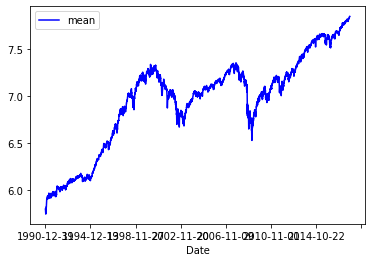

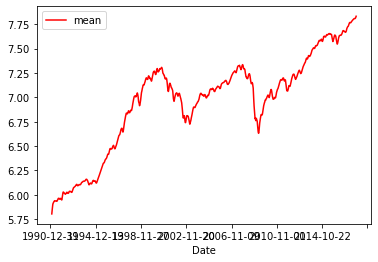

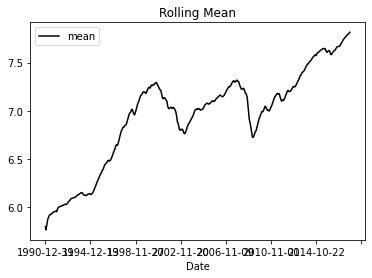

In [109]:
draw_moving(sp500_mean_log,30)

<Figure size 432x288 with 0 Axes>

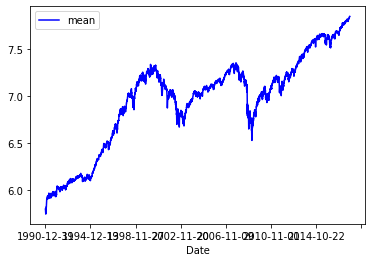

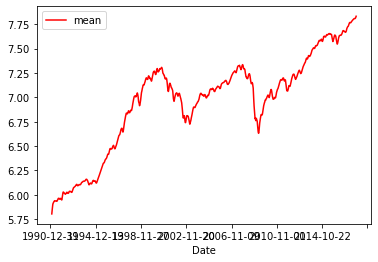

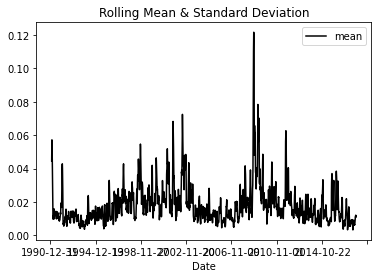

In [98]:
draw_trend(sp500_mean_log,30)

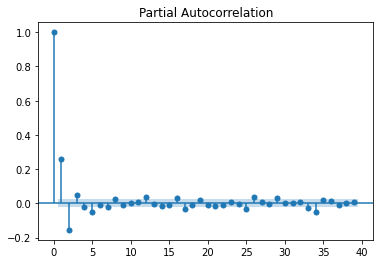

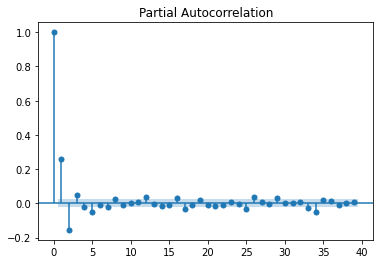

In [162]:
diff_1 = sp500_mean_log.diff(1)
diff_1.dropna(inplace=True)
sm.tsa.adfuller(diff_1)

plot_pacf(diff_1)

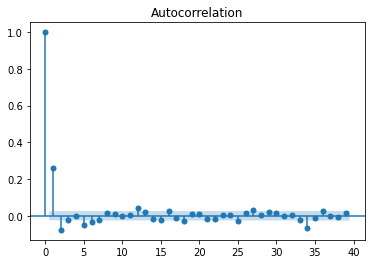

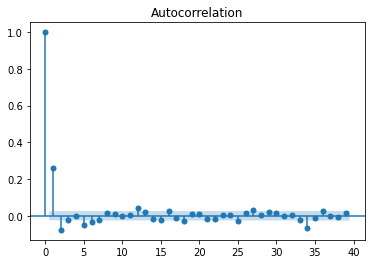

In [164]:
plot_acf(diff_1)

In [97]:
#sm.tsa.adfuller(sp500_Train)
#sm.tsa.adfuller(preds)
sm.tsa.adfuller(sp500_mean_log)
#sm.tsa.adfuller(sp500_Train,regression='ct')

(-1.2196876149777482,
 0.6650697805637493,
 35,
 6719,
 {'1%': -3.431323627034967,
  '5%': -2.861970262098559,
  '10%': -2.566999024865034},
 -45537.33348771917)

In [199]:
order = (1,1,1)
model = ARIMA(sp500_Train, order)
fit = model.fit()

d:\miniconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
d:\miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will

In [200]:
fit.aic

49726.222802896795

In [201]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.mean   No. Observations:                 6754
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -24859.111
Method:                       css-mle   S.D. of innovations              9.599
Date:                Wed, 24 Mar 2021   AIC                          49726.223
Time:                        14:02:37   BIC                          49753.494
Sample:                             1   HQIC                         49735.637
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3293      0.149      2.214      0.027       0.038       0.621
ar.L1.D.mean    -0.1366      0.032     -4.267      0.000      -0.199      -0.074
ma.L1.D.mean     0.4475      0.028     15.777      0.000       0.392       0.503
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -7.3225           +0.0000j            7.3225            0.5000
MA.1           -2.2346           +0.0000j            2.2346            0.5000
-----------------------------------------------------------------------------
"""

In [202]:
preds = fit.predict(1,6754,typ='levels')

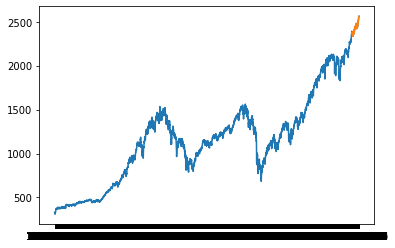

In [192]:

plt.plot(preds,label="migration time")
plt.plot(sp500_Train.iloc[6600:6754],label="request delay")


In [203]:
preds.to_frame()

,0
Date,
1991-01-02,329.194309
1991-01-03,328.768372
1991-01-04,323.186439
1991-01-07,320.327705
1991-01-08,317.958483
...,...
2017-10-13,2552.092009
2017-10-16,2556.070895
2017-10-17,2556.260241


In [204]:
sp500_Train.iloc[1:]

,mean
Date,
1991-01-02,328.600006
1991-01-03,324.214996
1991-01-04,320.610001
1991-01-07,318.205001
1991-01-08,315.380005
...,...
2017-10-13,2554.869995
2017-10-16,2556.054932
2017-10-17,2557.199951


In [205]:
finalResult['raw'] = sp500_Train.iloc[1:]
finalResult['predicted'] = preds.to_frame()

In [207]:

finalResult['residuals'] = finalResult['raw'] - finalResult['predicted']

In [208]:
finalResult.to_csv('ARIMA_Results.csv')

In [206]:
finalResult

,raw,predicted,residuals
Date,,,
1991-01-02,328.600006,329.194309,-0.594623
1991-01-03,324.214996,328.768372,-4.714633
1991-01-04,320.610001,323.186439,-3.934619
1991-01-07,318.205001,320.327705,-2.734622
1991-01-08,315.380005,317.958483,-3.154620
...,...,...,...
2017-10-13,2554.869995,2552.092009,2.720303
2017-10-16,2556.054932,2556.070895,0.855314
2017-10-17,2557.199951,2556.260241,0.815396
